In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
from scipy.io import wavfile

In [3]:
out_file = pd.read_excel('archive/BVC_Voice_Bio_Public.xlsx').set_index('New_ID')
out_file.head()

,Sex,Age,Ethnicity,Unnamed: 4,Unnamed: 5
New_ID,,,,,
4001,'Male',19,'Igbo',NaN,336
4002,'Male',23,'Igbo',NaN,190
4003,'Female',18,'Ikwerre',NaN,NaN
4004,'Male',23,'Annang',NaN,% Actual subjects = 526
4005,'Female',17,'Igbo',NaN,% Male subjects = 336


In [4]:
data = []
output = []
root = 'archive/multiple_sentences/multiple_sentences/'
file_names = os.listdir(root)

min_size = 100000000
for file in file_names:
    _, sample = wavfile.read(root + file)
    output.append(out_file.loc[int(file.split('_')[2]), ['Sex', 'Age', 'Ethnicity']])
    if min_size > sample.shape[0]:
        min_size = sample.shape[0]
    data.append(sample)

### The closest perfect square number will be used to clip the audio

In [5]:
size_data = int(min_size**0.5)**2

In [6]:


for i in range(len(data)):
    data[i] = np.concatenate([data[i][:size_data, 0], data[i][:size_data, 1]])

data = np.array(data)
output = np.array(output)

In [7]:
data.shape

(1778, 64082)

In [8]:
output.shape

(1778, 3)

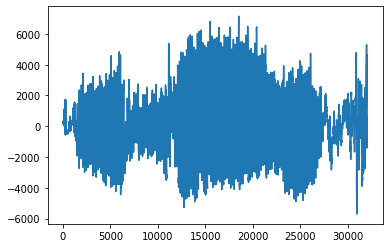

In [9]:
plt.plot(data[0, :size_data])
plt.show()

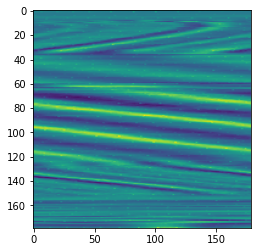

In [10]:
plt.imshow(data[0, :size_data].reshape(-1, int(size_data**0.5)))
plt.show()

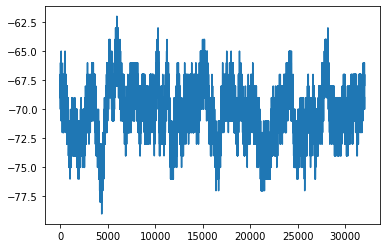

In [11]:
plt.plot(data[0, size_data:])
plt.show()

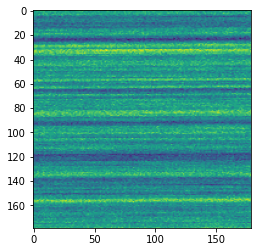

In [12]:
plt.imshow(data[0, size_data:].reshape(-1, int(size_data**0.5)))
plt.show()

### Now we will normalize the data

In [13]:
dict_unique_mci_category = dict(((b,a) for (a,b) in enumerate(set(output[:, 1]))))
dict_unique_mci_category_invert = {b:a for a,b in dict_unique_mci_category.items()}

In [14]:
dict_unique_mci_category

{35: 0,
 15: 1,
 16: 2,
 17: 3,
 18: 4,
 19: 5,
 20: 6,
 21: 7,
 22: 8,
 23: 9,
 24: 10,
 25: 11,
 26: 12,
 31: 13}

In [15]:
from sklearn.model_selection import train_test_split
import pickle

from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler

scaler = StandardScaler()
encoder = OneHotEncoder()


# X = data.drop('mci_category', axis = 1)
# y = label_binarize(data['mci_category'], classes=[0, 1, 2, 3, 4])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X = data.copy()
scaler.fit(X)
pickle.dump(scaler, open('saved_models/StandardScaler', 'wb'))
X = scaler.transform(X)

y = [dict_unique_mci_category[item] for item in output[:, 1]]
encoder.fit(np.array(y).reshape(-1, 1))
pickle.dump(encoder, open('saved_models/OneHotEncoder', 'wb'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
y_test

[8,
 3,
 2,
 9,
 9,
 11,
 4,
 9,
 4,
 4,
 4,
 3,
 4,
 9,
 5,
 6,
 4,
 3,
 5,
 3,
 7,
 6,
 7,
 11,
 2,
 8,
 8,
 12,
 9,
 7,
 4,
 5,
 10,
 4,
 8,
 4,
 4,
 2,
 5,
 8,
 4,
 4,
 4,
 3,
 7,
 7,
 1,
 2,
 2,
 4,
 4,
 6,
 1,
 3,
 11,
 6,
 8,
 9,
 6,
 5,
 1,
 3,
 6,
 7,
 3,
 2,
 6,
 4,
 7,
 2,
 5,
 5,
 8,
 7,
 7,
 9,
 9,
 8,
 7,
 10,
 5,
 1,
 9,
 3,
 7,
 9,
 4,
 5,
 5,
 7,
 5,
 6,
 8,
 5,
 7,
 3,
 9,
 7,
 8,
 7,
 3,
 9,
 5,
 2,
 9,
 2,
 6,
 5,
 4,
 10,
 4,
 3,
 4,
 4,
 8,
 12,
 4,
 3,
 4,
 4,
 9,
 7,
 7,
 2,
 5,
 4,
 5,
 9,
 3,
 4,
 9,
 5,
 7,
 5,
 6,
 8,
 3,
 9,
 8,
 3,
 7,
 7,
 12,
 4,
 9,
 11,
 7,
 2,
 7,
 8,
 3,
 6,
 9,
 4,
 4,
 9,
 3,
 6,
 0,
 1,
 1,
 9,
 4,
 5,
 3,
 3,
 3,
 3,
 4,
 3,
 13,
 7,
 7,
 3,
 12,
 9,
 3,
 8,
 3,
 5,
 4,
 4,
 6,
 3,
 3,
 10,
 7,
 3,
 5,
 10,
 5,
 3,
 7,
 2,
 4,
 5,
 2,
 9,
 7,
 5,
 7,
 3,
 5,
 4,
 11,
 5,
 2,
 8,
 4,
 7,
 9,
 4,
 4,
 9,
 5,
 9,
 3,
 7,
 11,
 1,
 3,
 11,
 8,
 3,
 6,
 4,
 4,
 2,
 0,
 5,
 6,
 9,
 10,
 12,
 3,
 6,
 5,
 5,
 4,
 4,
 3,
 9,
 4,
 3,
 4,
 

In [17]:
# defined function to test the model
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc




def get_results(model, y_test, X_test, encoder):
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    try:
        y_oneHot = encoder.transform(np.array(y_test).reshape(-1, 1)).toarray()
        
        prob_pred = model.predict_proba(X_test)
        
        n_classes = y_oneHot.shape[1]
        macro_roc_auc_ovo = roc_auc_score(y_oneHot, prob_pred, multi_class="ovo",
                                            average="macro")
        weighted_roc_auc_ovo = roc_auc_score(y_oneHot, prob_pred, multi_class="ovo",
                                            average="weighted")
        macro_roc_auc_ovr = roc_auc_score(y_oneHot, prob_pred, multi_class="ovr",
                                            average="macro")
        weighted_roc_auc_ovr = roc_auc_score(y_oneHot, prob_pred, multi_class="ovr",
                                            average="weighted")
        print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                "(weighted by prevalence)"
                .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
        print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                "(weighted by prevalence)"
                .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))
        

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_oneHot[:, i], prob_pred[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot of a ROC curve for a specific class
        for i in range(n_classes):
            plt.figure()
            plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'performance of the model {i}')
            plt.legend(loc="lower right")
            plt.show()
    except:
        pass

/Users/ankushpandey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        13
           2       0.10      0.04      0.06        25
           3       0.11      0.09      0.10        79
           4       0.19      0.25      0.22        81
           5       0.09      0.07      0.08        59
           6       0.15      0.10      0.12        29
           7       0.09      0.11      0.10        47
           8       0.10      0.24      0.14        29
           9       0.13      0.12      0.13        50
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         3

    accuracy                           0.12       445
   macro avg       0.07      0.07      0.07       445
weighted avg       0.11      0.12      0.11       445

One-vs-One ROC AUC scores

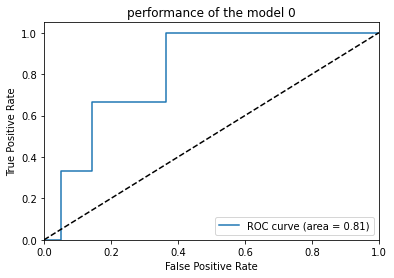

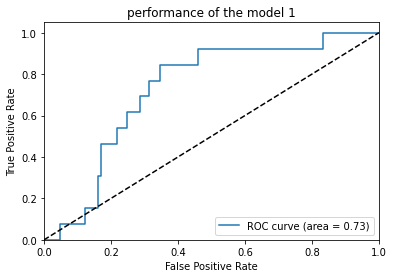

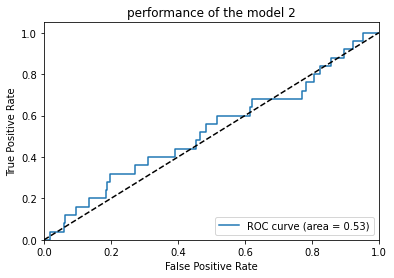

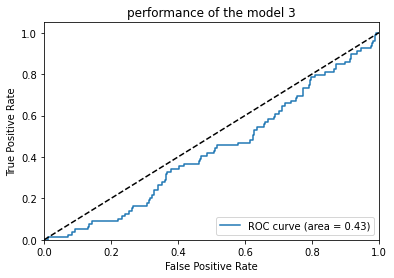

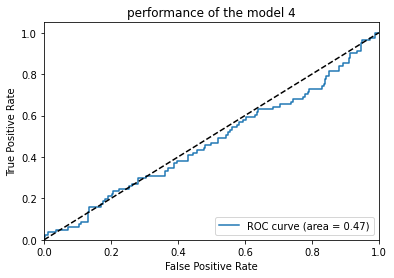

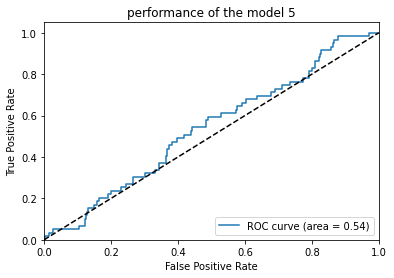

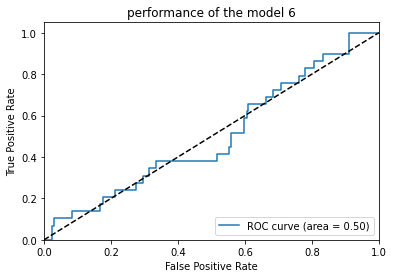

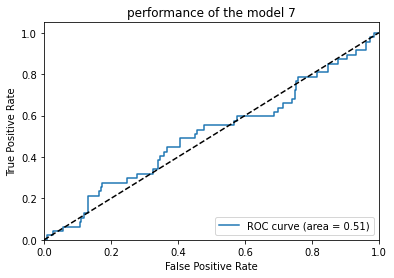

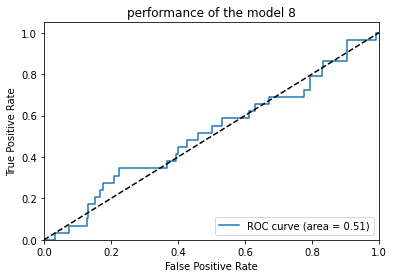

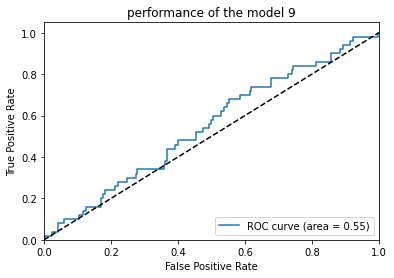

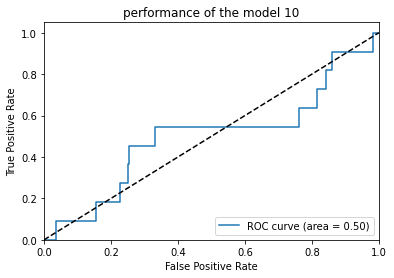

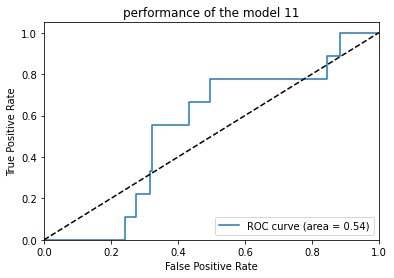

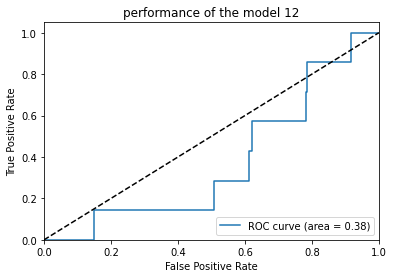

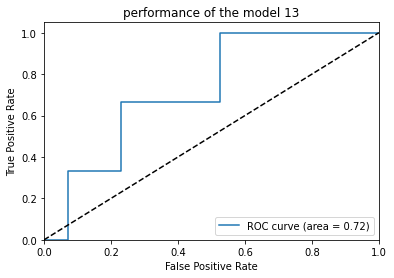

In [147]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()

lr1.fit(X_train, y_train)
pickle.dump(lr1, open('saved_models/LogisticRegression', 'wb'))

pred = lr1.predict(X_test)

get_results(lr1, y_test, X_test, encoder)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.17      0.08      0.11        13
           2       0.03      0.04      0.04        25
           3       0.17      0.19      0.18        79
           4       0.18      0.19      0.18        81
           5       0.11      0.08      0.10        59
           6       0.03      0.03      0.03        29
           7       0.11      0.11      0.11        47
           8       0.05      0.07      0.06        29
           9       0.18      0.12      0.14        50
          10       0.06      0.09      0.07        11
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         3

    accuracy                           0.12       445
   macro avg       0.08      0.07      0.07       445
weighted avg       0.12      0.12      0.12       445

One-vs-One ROC AUC scores

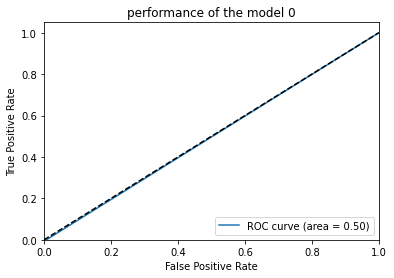

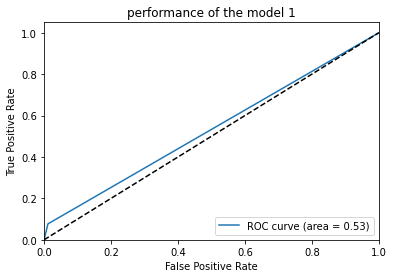

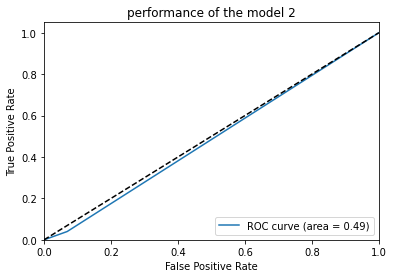

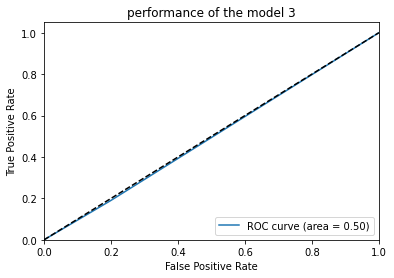

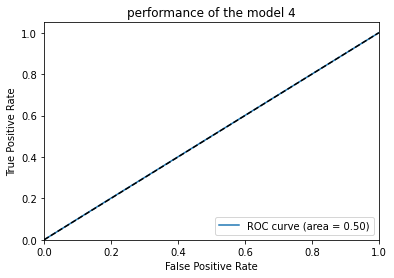

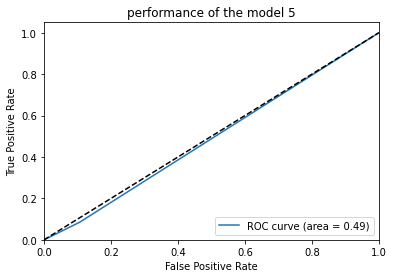

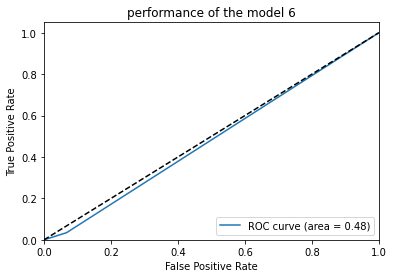

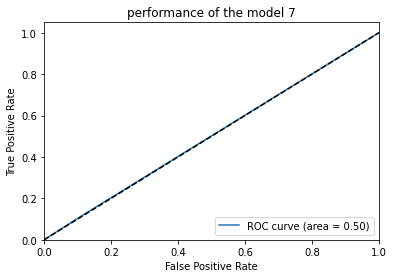

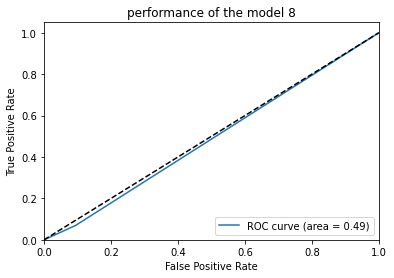

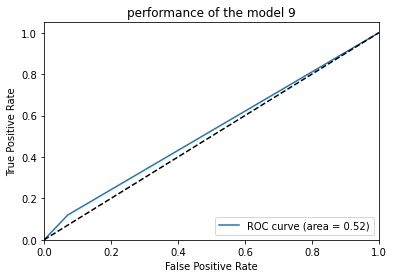

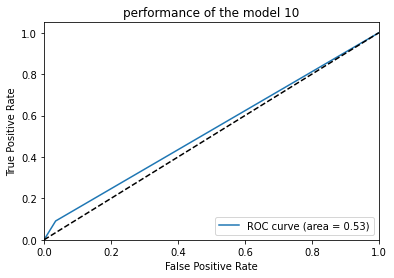

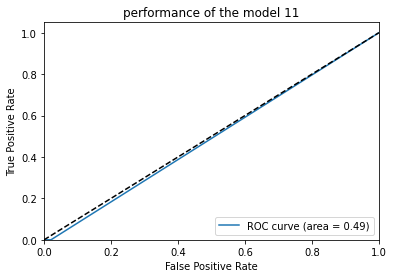

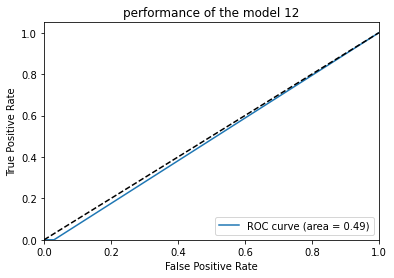

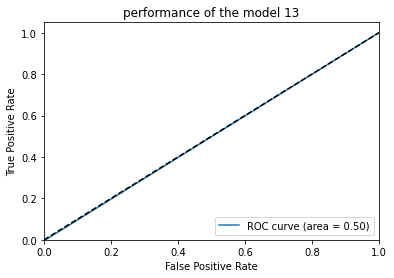

In [148]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
pickle.dump(dtree, open('saved_models/DecisionTreeClassifier', 'wb'))

pred = dtree.predict(X_test)

get_results(dtree, y_test, X_test, encoder)

/Users/ankushpandey/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ankushpandey/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ankushpandey/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.02      0.67      0.04         3
           1       0.06      0.23      0.10        13
           2       0.00      0.00      0.00        25
           3       0.24      0.08      0.12        79
           4       0.24      0.19      0.21        81
           5       0.24      0.07      0.11        59
           6       0.14      0.10      0.12        29
           7       0.04      0.02      0.03        47
           8       0.07      0.28      0.11        29
           9       0.23      0.10      0.14        50
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         3

    accuracy                           0.11       445
   macro avg       0.09      0.12      0.07       445
weighted avg       0.16      0.11      0.11       445

One-vs-One ROC AUC scores

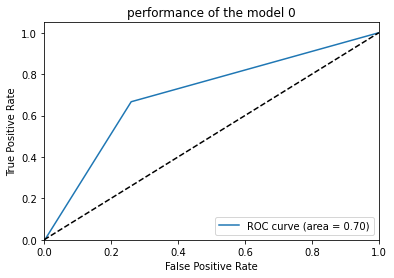

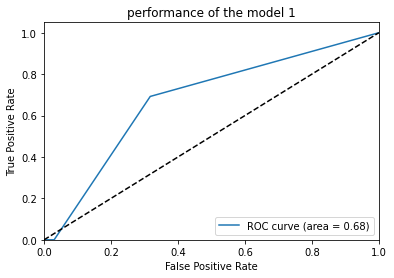

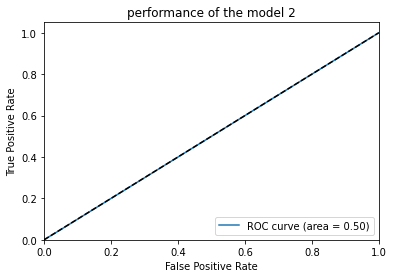

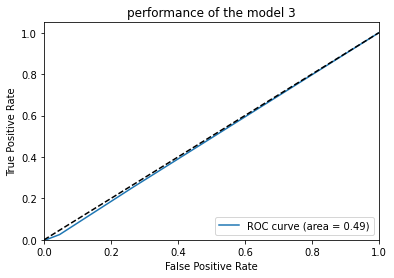

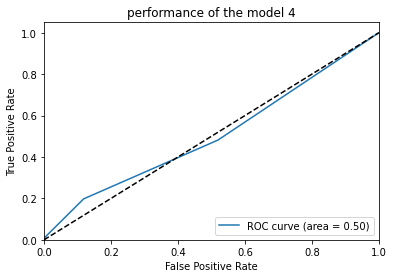

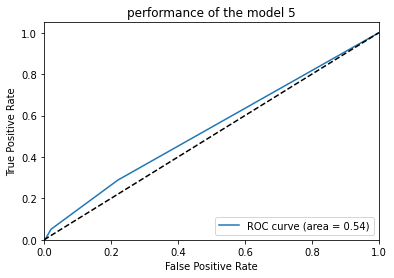

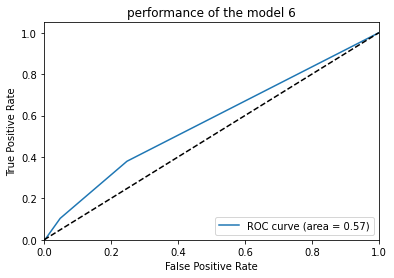

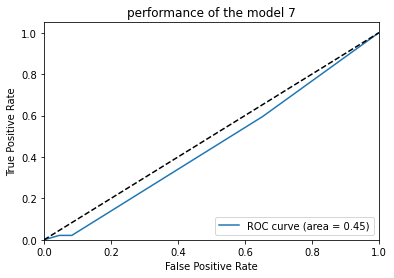

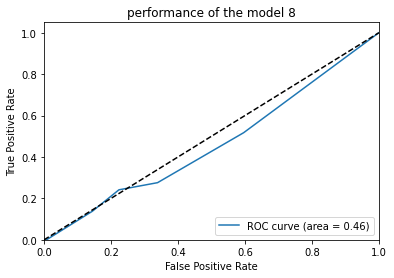

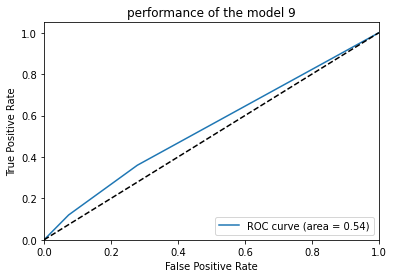

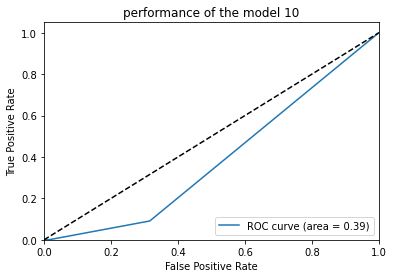

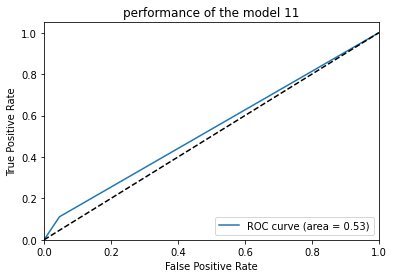

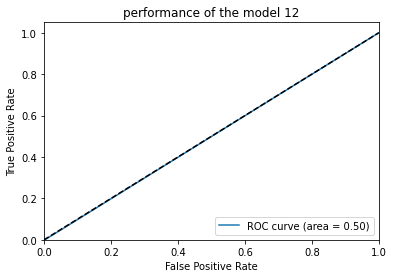

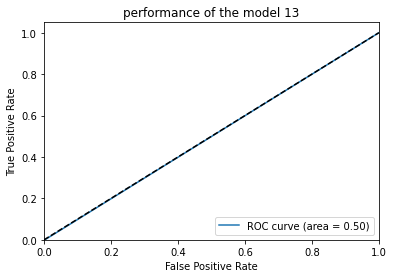

In [149]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
pickle.dump(knn, open('saved_models/KNeighborsClassifier', 'wb'))

pred = knn.predict(X_test)

get_results(knn, y_test, X_test, encoder)

### Now we will make bins of the age data, and see if that works

In [151]:
y = np.array([0 if item <= 19 else 1 for item in output[:, 1]])

encoder_binned = OneHotEncoder()

encoder_binned.fit(np.array(y).reshape(-1, 1))
pickle.dump(encoder_binned, open('saved_models/OneHotEncoder_binned', 'wb'))

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.25, random_state=42)

/Users/ankushpandey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.56      0.47      0.52       257
           1       0.41      0.50      0.45       188

    accuracy                           0.49       445
   macro avg       0.49      0.49      0.48       445
weighted avg       0.50      0.49      0.49       445

One-vs-One ROC AUC scores:
0.493460 (macro),
0.493460 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.493460 (macro),
0.493460 (weighted by prevalence)


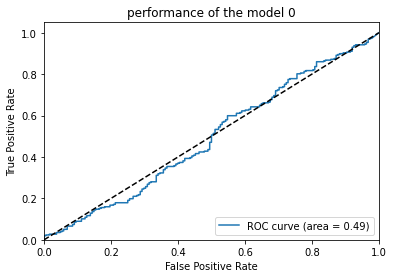

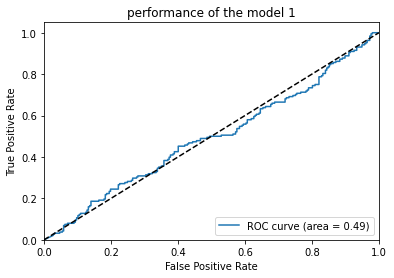

In [152]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()

lr1.fit(X_train_1, y_train_1)
pickle.dump(lr1, open('saved_models/LogisticRegression', 'wb'))

pred = lr1.predict(X_test_1)

get_results(lr1, y_test_1, X_test_1, encoder_binned)

              precision    recall  f1-score   support

           0       0.59      0.56      0.57       257
           1       0.43      0.46      0.45       188

    accuracy                           0.52       445
   macro avg       0.51      0.51      0.51       445
weighted avg       0.52      0.52      0.52       445

One-vs-One ROC AUC scores:
0.509593 (macro),
0.509593 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.509593 (macro),
0.509593 (weighted by prevalence)


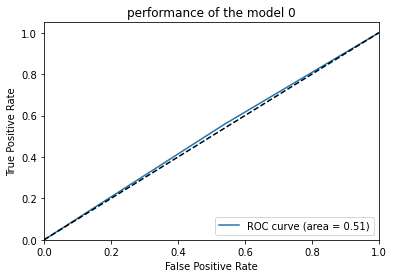

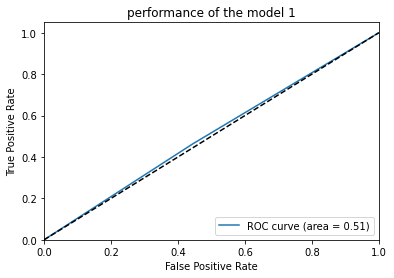

In [153]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train_1, y_train_1)
pickle.dump(dtree, open('saved_models/DecisionTreeClassifier', 'wb'))

pred = dtree.predict(X_test_1)

get_results(dtree, y_test_1, X_test_1, encoder_binned)

              precision    recall  f1-score   support

           0       0.60      0.19      0.29       257
           1       0.43      0.82      0.56       188

    accuracy                           0.46       445
   macro avg       0.51      0.51      0.43       445
weighted avg       0.52      0.46      0.41       445

One-vs-One ROC AUC scores:
0.519890 (macro),
0.519890 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.519890 (macro),
0.519890 (weighted by prevalence)


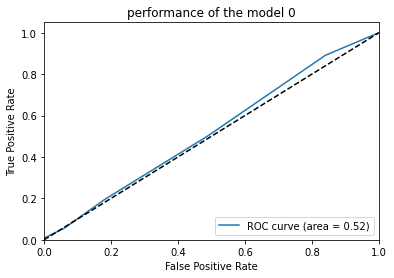

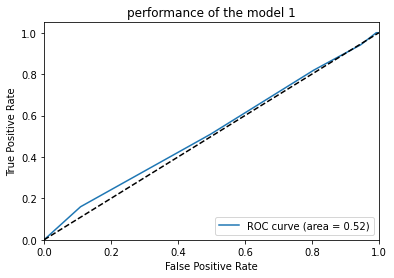

In [154]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_1, y_train_1)
pickle.dump(knn, open('saved_models/KNeighborsClassifier', 'wb'))

pred = knn.predict(X_test_1)

get_results(knn, y_test_1, X_test_1, encoder_binned)

In [155]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train_1, y_train_1)
pickle.dump(svm, open('saved_models/SVC', 'wb'))

pred = svm.predict(X_test_1)

get_results(svm, y_test_1, X_test_1, encoder_binned)

              precision    recall  f1-score   support

           0       0.58      0.99      0.73       257
           1       0.33      0.01      0.01       188

    accuracy                           0.58       445
   macro avg       0.46      0.50      0.37       445
weighted avg       0.47      0.58      0.43       445



              precision    recall  f1-score   support

           0       0.52      0.49      0.51       257
           1       0.36      0.39      0.37       188

    accuracy                           0.45       445
   macro avg       0.44      0.44      0.44       445
weighted avg       0.46      0.45      0.45       445

One-vs-One ROC AUC scores:
0.450689 (macro),
0.450697 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.450689 (macro),
0.450697 (weighted by prevalence)


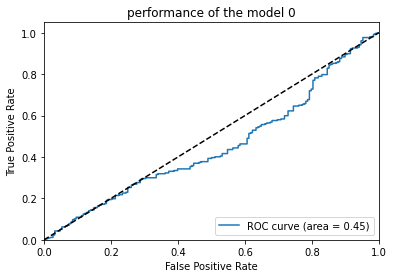

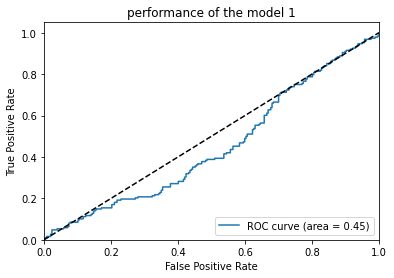

In [156]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes = [20, 32, 64, 32, 20])

ann.fit(X_train_1, y_train_1)
pickle.dump(ann, open('saved_models/MLPClassifier', 'wb'))

pred = ann.predict(X_test_1)

get_results(ann, y_test_1, X_test_1, encoder_binned)

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [158]:
model = Sequential()
model.add(Dense(4, input_shape=(size_data*2,), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [159]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [160]:
model.fit(X_train_1, y_train_1, epochs=70, batch_size=10, validation_data = (X_test_1, y_test_1))

Epoch 1/70


2022-11-28 19:06:46.215428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


134/134 [==============================] - ETA: 0s - loss: 2.5151 - accuracy: 0.4929

2022-11-28 19:06:48.263973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


134/134 [==============================] - 3s 16ms/step - loss: 2.5151 - accuracy: 0.4929 - val_loss: 2.2425 - val_accuracy: 0.4966
Epoch 2/70
134/134 [==============================] - 1s 10ms/step - loss: 1.5073 - accuracy: 0.6422 - val_loss: 2.5820 - val_accuracy: 0.5101
Epoch 3/70
134/134 [==============================] - 1s 10ms/step - loss: 0.9135 - accuracy: 0.6902 - val_loss: 2.5814 - val_accuracy: 0.5034
Epoch 4/70
134/134 [==============================] - 1s 9ms/step - loss: 0.6144 - accuracy: 0.7292 - val_loss: 2.6797 - val_accuracy: 0.5191
Epoch 5/70
134/134 [==============================] - 1s 10ms/step - loss: 0.4679 - accuracy: 0.7517 - val_loss: 2.5191 - val_accuracy: 0.5416
Epoch 6/70
134/134 [==============================] - 1s 10ms/step - loss: 0.3684 - accuracy: 0.7839 - val_loss: 2.6897 - val_accuracy: 0.5393
Epoch 7/70
134/134 [==============================] - 1s 9ms/step - loss: 0.3054 - accuracy: 0.8230 - val_loss: 2.8153 - val_accuracy: 0.5416
Epoch 8/70
1

In [161]:
_, accuracy = model.evaluate(X_test_1, y_test_1)
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 12ms/step - loss: 6.8589 - accuracy: 0.4742
Accuracy: 47.42


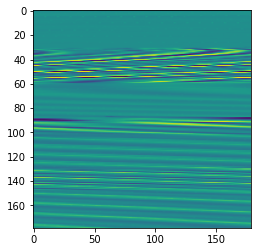

In [162]:
plt.imshow(X_test_1[0, :size_data].reshape(-1, int(size_data**0.5)))
plt.show()

## Trying out the regression approach

In [18]:
y_1 = output[:, 1]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y_1, test_size=0.25, random_state=42)

In [19]:
def test_linear_model(model, X_train_1, X_test_1, y_train_1, y_test_1):
    model.fit(X_train_1, y_train_1)
    pred = model.predict(X_test_1)
    print(f'The Mean squared error is: {mean_squared_error(y_test_1, pred)}')
    
    plt.figure()
    plt.scatter(y_test_1, pred)
    plt.show()


The Mean squared error is: 110.25160241007559


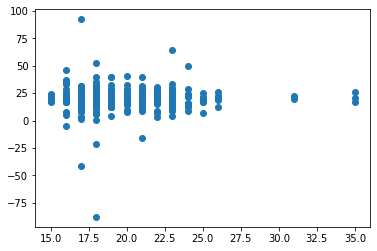

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
test_linear_model(lm, X_train_1, X_test_1, y_train_1, y_test_1)


The Mean squared error is: 22.397752808988763


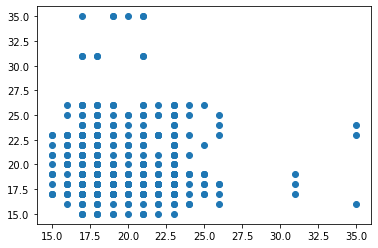

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtree_r = DecisionTreeRegressor()
test_linear_model(dtree_r, X_train_1, X_test_1, y_train_1, y_test_1)


The Mean squared error is: 9.457187413944784


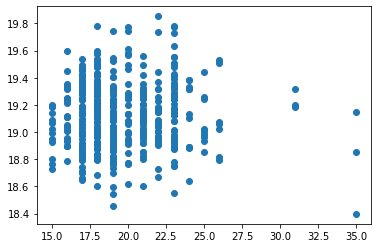

In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svm_r = SVR()
test_linear_model(svm_r, X_train_1, X_test_1, y_train_1, y_test_1)


The Mean squared error is: 10.349483146067417


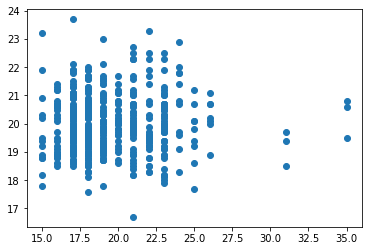

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(n_estimators = 10)
test_linear_model(rfr, X_train_1, X_test_1, y_train_1, y_test_1)


In [24]:
X_train_1

array([[-1.28642667e-01, -1.17726876e-01, -1.03934774e-01, ...,
        -1.23973128e-03, -1.31006272e-03, -8.93810197e-03],
       [-8.05814146e-03, -3.56093001e-03,  6.17583773e-05, ...,
        -5.62966287e-02, -5.90303162e-02, -5.88720625e-02],
       [-5.69745055e-02, -5.46200717e-02, -5.39699597e-02, ...,
        -1.10713201e-02, -1.80675557e-02, -2.18839436e-02],
       ...,
       [-1.55376029e-01, -1.43543296e-01, -1.35308030e-01, ...,
        -2.87681800e-02, -3.48250486e-02, -3.48297852e-02],
       [-1.65900654e-02, -1.38874980e-02, -1.03959935e-02, ...,
        -2.68018622e-02, -2.73772740e-02, -3.11309733e-02],
       [-1.08166049e-01, -1.28053444e-01, -1.24850278e-01, ...,
        -1.23973128e-03, -5.03395004e-03, -7.08869602e-03]])

The Mean squared error is: 93.27057995225306


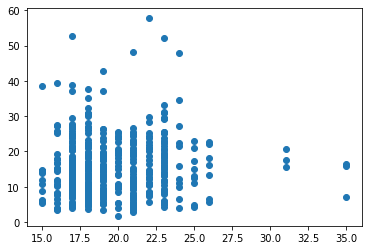

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

rfr = MLPRegressor([8, 16, 32, 16, 16, 8])
test_linear_model(rfr, X_train_1, X_test_1, y_train_1, y_test_1)
